In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [215]:
dataset=pd.read_csv("Advertising.csv")
print(dataset.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [216]:
dataset.drop(columns=['Radio','Newspaper'],inplace=True)
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [217]:
x=dataset["TV"]
y=dataset["Sales"]

<Axes: xlabel='TV', ylabel='Sales'>

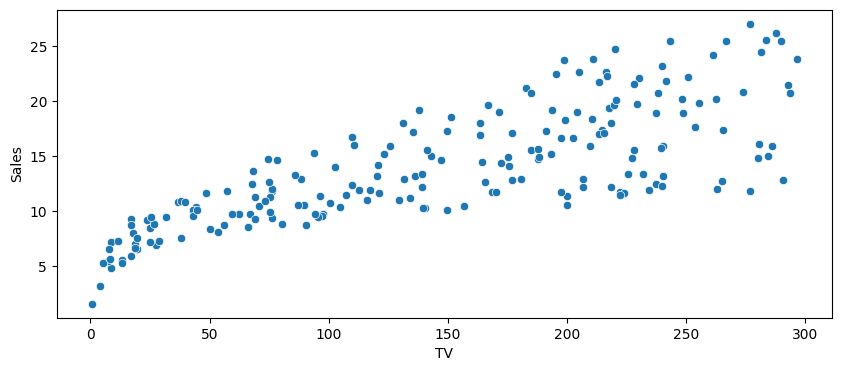

In [218]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=x,y=y)

In [219]:
print(x.ndim)
print(y.ndim)

1
1


In [220]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3,random_state=0)
X=dataset[['TV']]
dt.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [221]:
print(x.ndim)
print(X.ndim)
print(y.ndim)

1
2
1


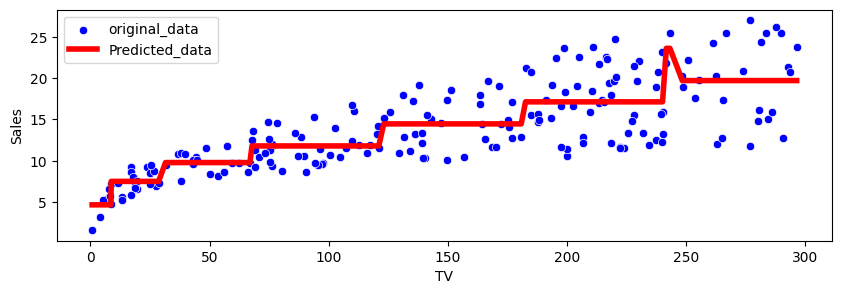

In [223]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=x,y=y,color="blue",label="original_data")
y_pred=dt.predict(x.sort_values().to_frame())
plt.plot(x.sort_values(),y_pred,color="red",label="Predicted_data",linewidth=4)
plt.legend()
plt.show()

In [228]:
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file="tree.dot",feature_names=["Tv"])

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

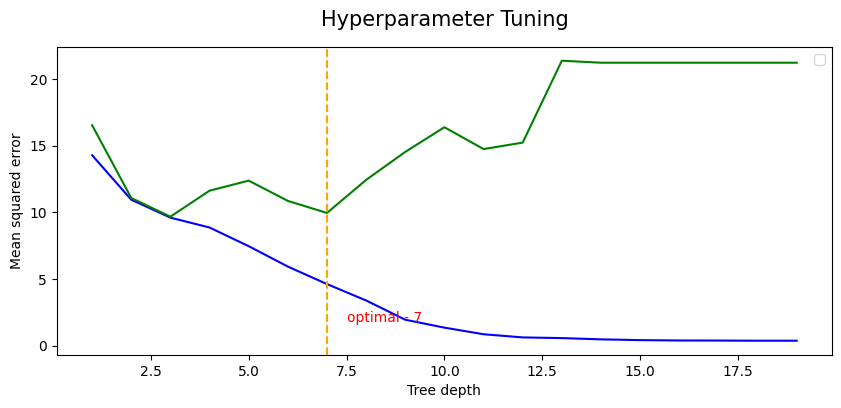

In [252]:
from sklearn.metrics import mean_squared_error as mse

n=range(1,20)
train_error=[]
for i in n:
  model=DecisionTreeRegressor(max_depth=i)
  model.fit(X,y)
  train_error.append(mse(y,model.predict(X)))

test_error=[]
for i in n:
  model_1=DecisionTreeRegressor(max_depth=i)
  model_1.fit(x_train,y_train)
  test_error.append(mse(y_test,model_1.predict(x_test)))

plt.figure(figsize=(10,4))
plt.plot(n,train_error,color="blue")
plt.plot(n,test_error,color="green")
plt.axvline(x=7,color="orange",linestyle="--")
plt.annotate("optimal - 7",xy=(7.5,1.8),color="red")
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

In [259]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()

gs=GridSearchCV(model,param_grid={'max_depth':range(1,21),'min_samples_split':range(10,100,10)},cv=5,n_jobs=1,scoring="neg_mean_squared_error")

gs.fit(x_train,y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 3, 'min_samples_split': 30}
11.946222705843777


Text(0.5, 1.0, 'Best Fitting')

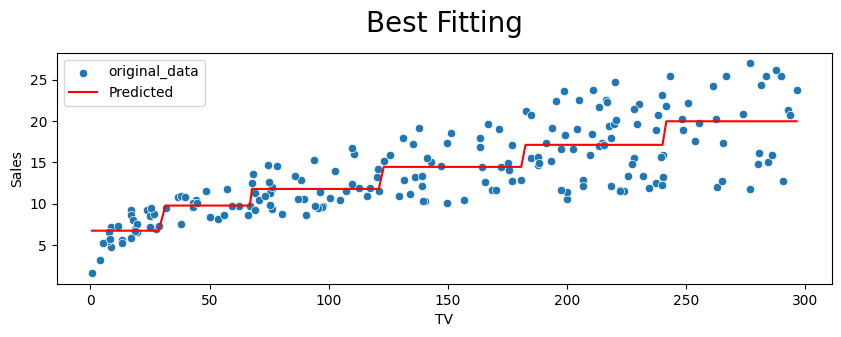

In [269]:
plt.figure(figsize=(10,3))
sns.scatterplot(x=dataset["TV"],y=dataset["Sales"],label="original_data")

dt=DecisionTreeRegressor(max_depth=3,min_samples_split=30)
dt.fit(dataset[["TV"]],dataset["Sales"])
plt.plot(dataset["TV"].sort_values(),dt.predict(dataset["TV"].sort_values().to_frame()),color="red",label="Predicted")
plt.legend()
plt.title("Best Fitting",pad=15,size=20)